In [106]:
import time
start = time.process_time()
from obspy import read,UTCDateTime
import numpy as np
import pandas as pd
import glob
import os, math
import matplotlib.pyplot as plt
import h5py
import csv
from os.path import join
from datetime import datetime, timedelta


train_data_path = r'../data/train_data/'
net_phases = np.load('../data/train_data/seismic_phase.npy',allow_pickle=True).item()
output_dir='../detections_xfj'
save_dir = os.path.join(out_dir, 'traces_outputs')

In [76]:
dd = pd.read_csv(os.path.join(save_dir,'X_prediction_results.csv'))

比较时兼顾以下情况：1.auto有，manu无；2.manu有，auto无；3.二者都有

In [176]:
Pmoren=0
Pmissn=0
Smoren=0
Smissn=0
perrors = []
serrors = []
for i in range(len(dd)):
    pa = False
    sa = False
    pm = False
    sm = False
    fn = dd.values[i][1]+'.'+dd.values[i][0].split('_')[1]
    st = dd.values[i][2].strip()
    if fn not in net_phases:
        continue
    if str(dd.values[i][11]) != 'nan':
        ptemp = dd.values[i][11]
        if ptemp.find('.') == -1:
             ptemp = ptemp+'.000000'
        Pauto = datetime.strptime(ptemp, '%Y-%m-%d %H:%M:%S.%f')
        Pauto = UTCDateTime(Pauto)+8*3600
        pa = True
    if str(dd.values[i][15]) != 'nan':
        stemp = dd.values[i][15]
        if stemp.find('.') == -1:
            stemp = stemp+'.000000'
        Sauto = datetime.strptime(stemp, '%Y-%m-%d %H:%M:%S.%f')
        Sauto = UTCDateTime(Sauto)+8*3600
        sa = True
    if 'P' in net_phases[fn][st]:
        Pmanu = net_phases[fn][st]['P']
        pm = True
    if 'S' in net_phases[fn][st]:
        Smanu = net_phases[fn][st]['S']
        sm = True
    if pa and pm:
        perrors.append(int((Pauto - Pmanu)*100))
    if sa and sm:
        serrors.append(int((Sauto - Smanu)*100))
    if pa and not pm:
        Pmoren +=1
    if sa and not sm:
        Smoren +=1
    if pm and not pa:
        Pmissn +=1
    if sm and not sa:
        Smissn +=1
#     break

In [245]:
perrors = np.array(perrors)
serrors = np.array(serrors)

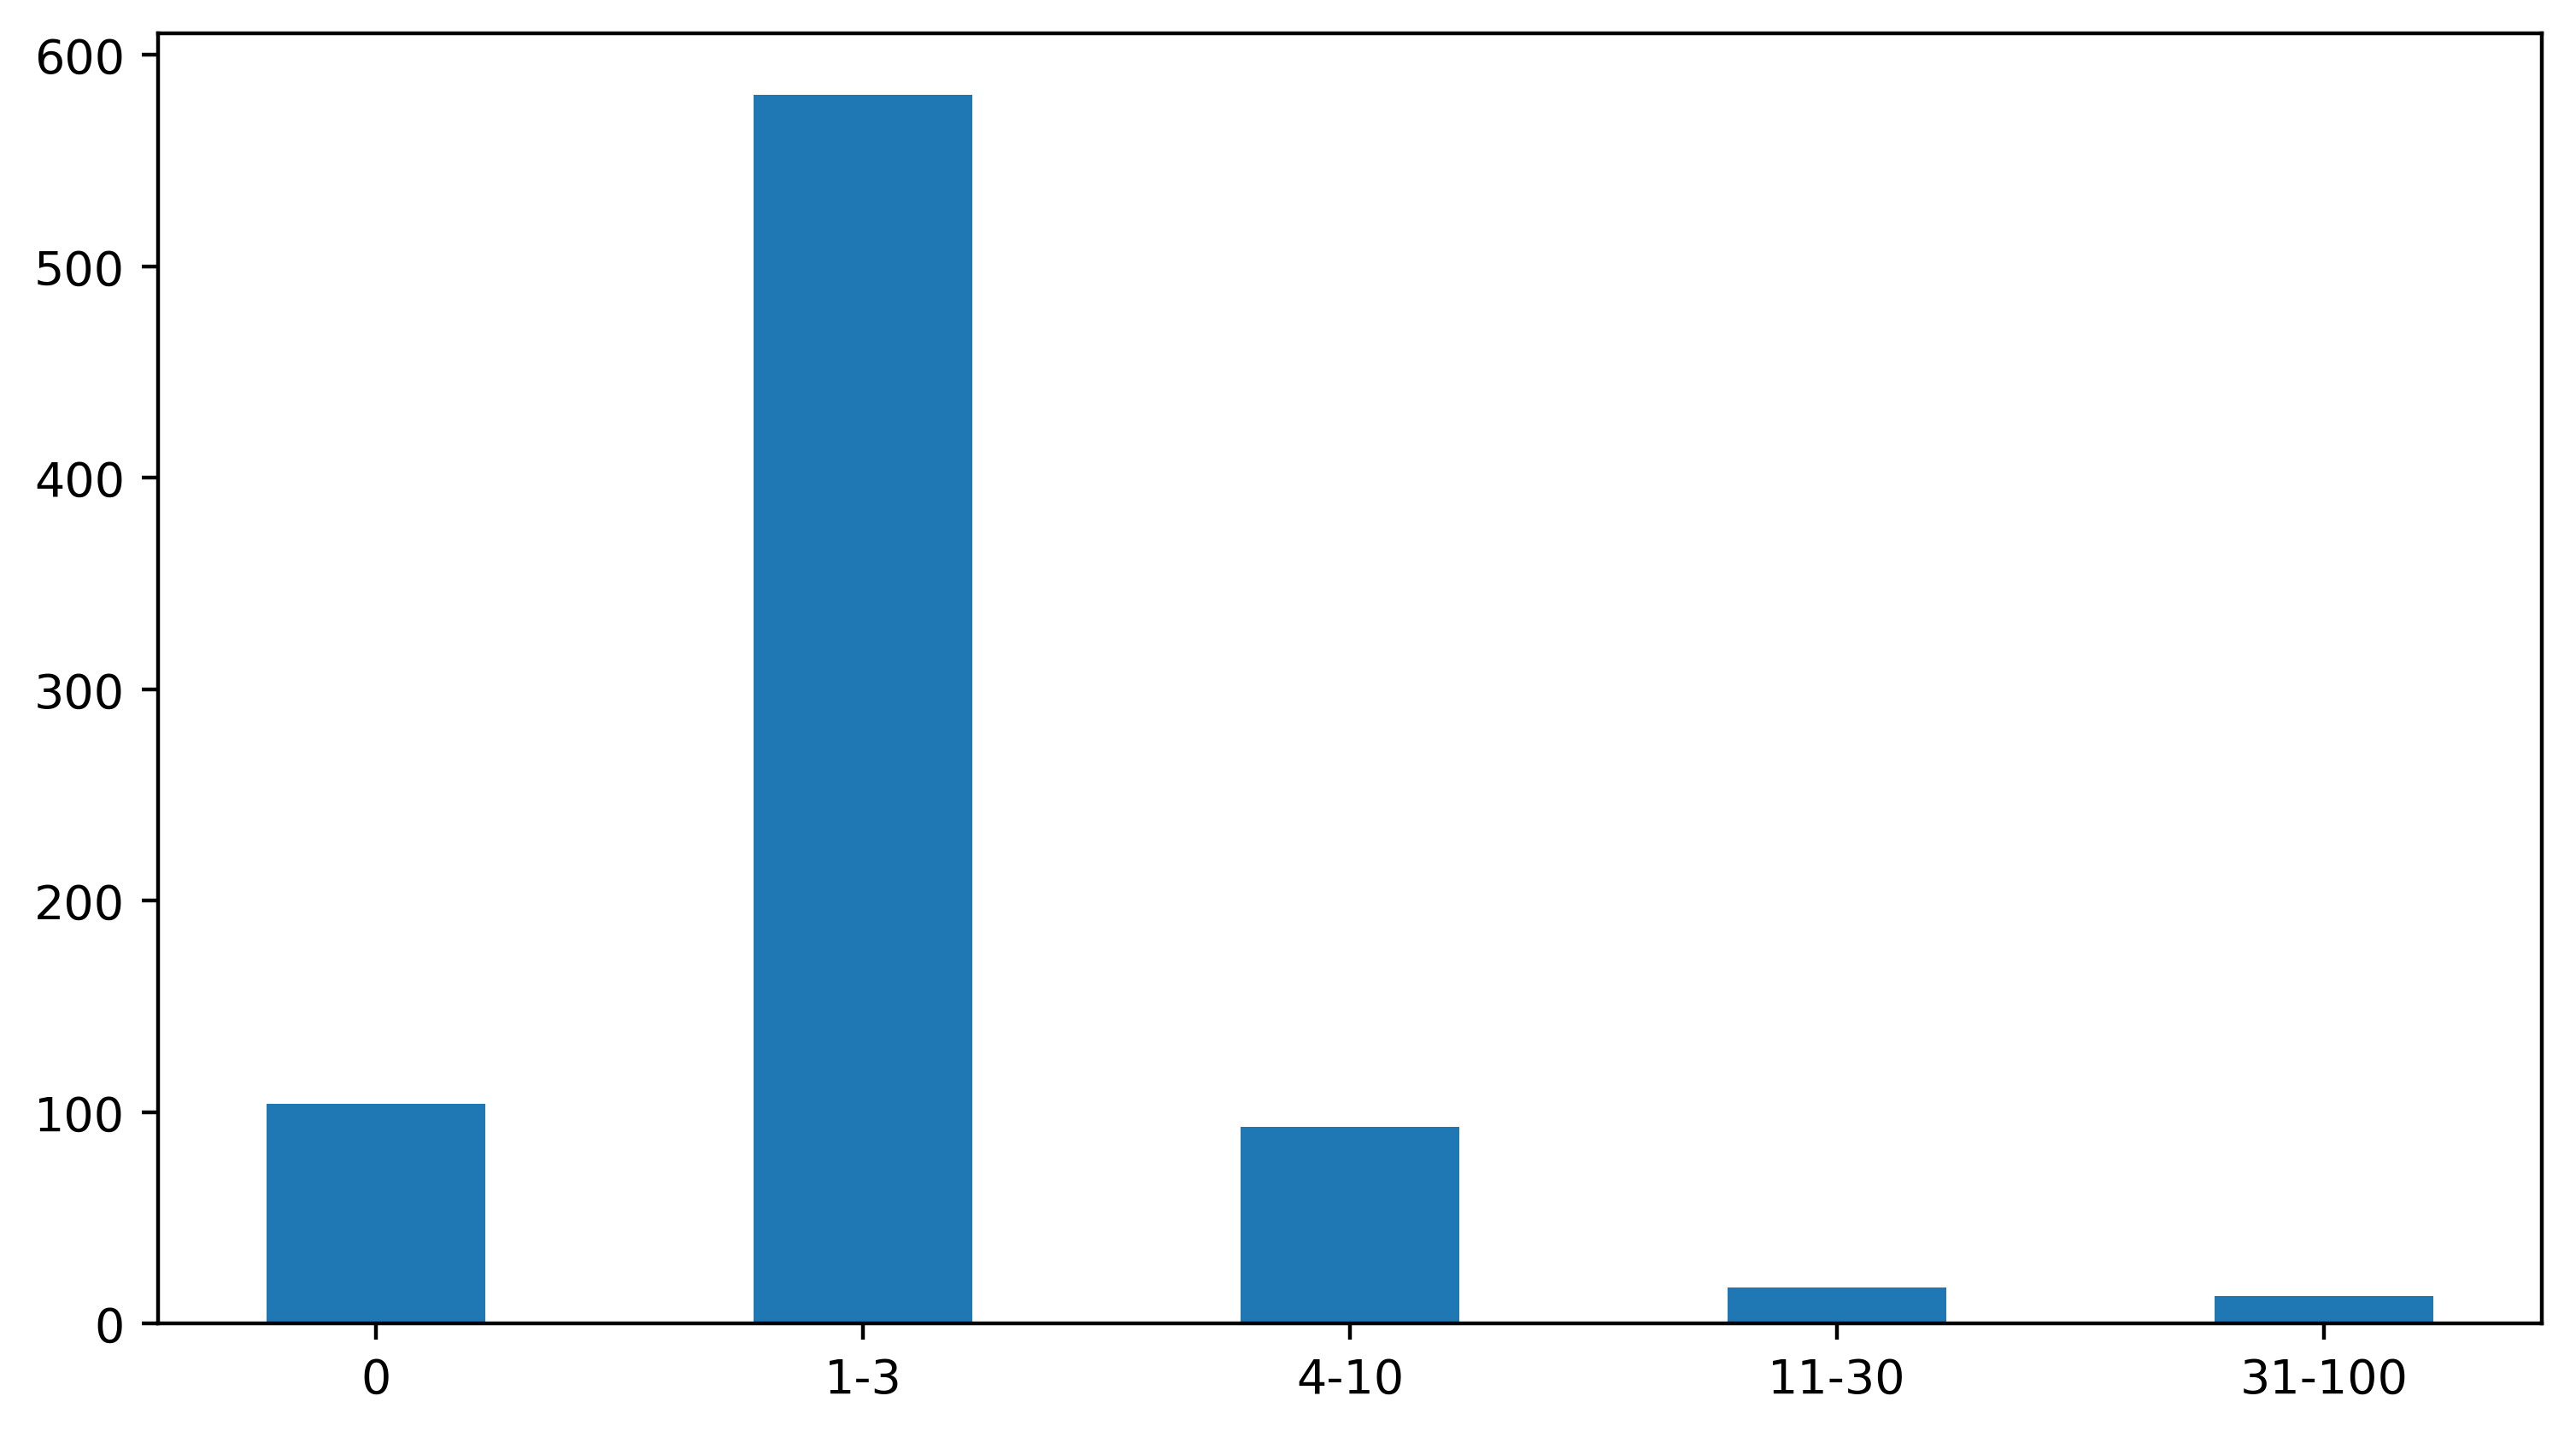

In [289]:
plt.close()
plt.figure(figsize=(9, 5), dpi=400)
N=5
index = np.arange(N)
a = len((np.where(abs(perrors) == 0))[0])
b = len((np.where((abs(perrors) <= 3) & (abs(perrors) >=1) ))[0])
c = len((np.where((abs(perrors) <= 10) & (abs(perrors) >= 4) ))[0])
d= len((np.where((abs(perrors) <= 30) & (abs(perrors) >= 11) ))[0])
e = len((np.where((abs(perrors) <= 100) & (abs(perrors) > 30) ))[0])
values = (a,b,c,d,e)
# 柱子的宽度
width = 0.45
# 绘制柱状图
p = plt.bar(index, values, width, label="num")
plt.xticks(index, ('0', '1-3', '4-10','11-30','31-100'))
plt.savefig('perrors.png')

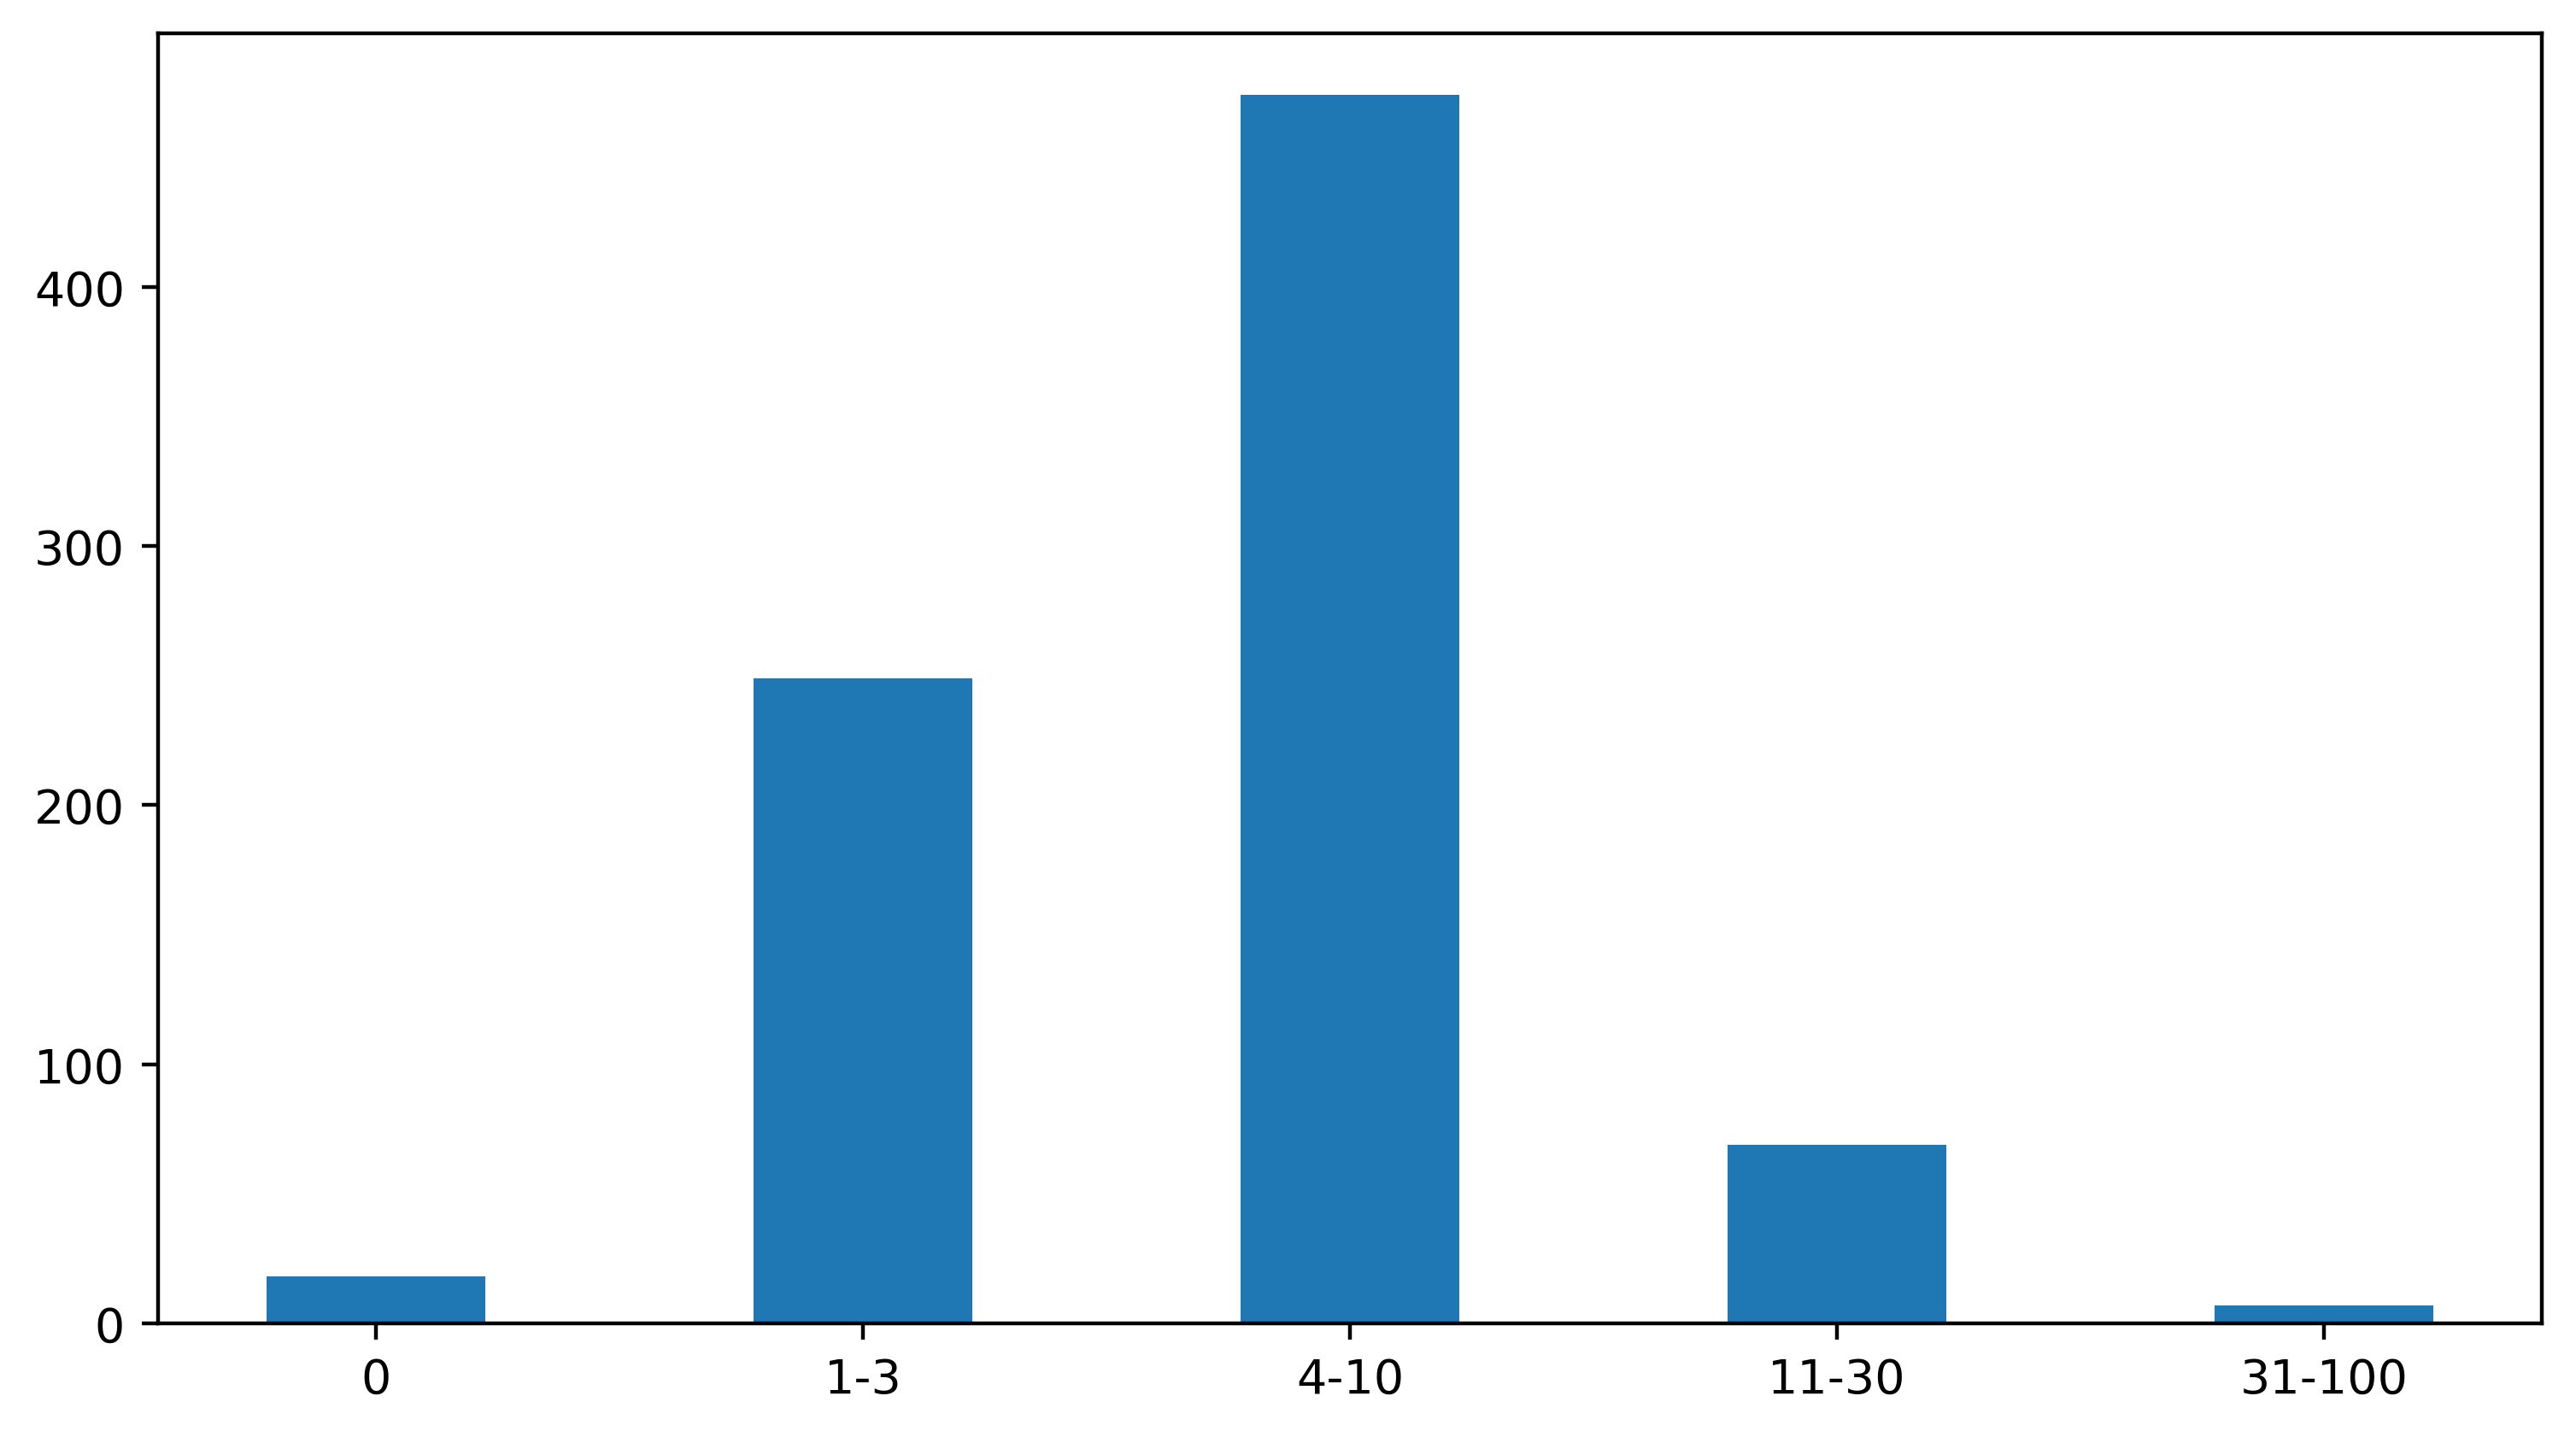

In [288]:
plt.close()
plt.figure(figsize=(9, 5), dpi=400)
N=5
index = np.arange(N)
a = len((np.where(abs(serrors) == 0))[0])
b = len((np.where((abs(serrors) <= 3) & (abs(serrors) >=1) ))[0])
c = len((np.where((abs(serrors) <= 10) & (abs(serrors) >= 4) ))[0])
d= len((np.where((abs(serrors) <= 30) & (abs(serrors) >= 11) ))[0])
e = len((np.where((abs(serrors) <= 100) & (abs(serrors) > 30) ))[0])
values = (a,b,c,d,e)
# 柱子的宽度
width = 0.45
# 绘制柱状图
p2 = plt.bar(index, values, width, label="num")
plt.xticks(index, ('0', '1-3', '4-10','11-30','31-100'))
plt.savefig('serrors.png')

In [292]:
Pwrong = len((np.where((abs(perrors) <= 100) & (abs(perrors) > 30) ))[0])
Swrong = len((np.where((abs(serrors) <= 100) & (abs(serrors) > 30) ))[0])
P_det_wrong = len((np.where(abs(perrors) > 100))[0])
S_det_wrong = len((np.where(abs(serrors) > 100))[0])

In [293]:
S_det_wrong

273

In [291]:
print('拾取错误P：'+str(Pwrong))
print('拾取遗漏P：'+str(Pmissn))
print('多拾取P：'+str(Pmoren))
print('拾取错误S：'+str(Swrong))
print('拾取遗漏S：'+str(Smissn))
print('多拾取S：'+str(Smoren))
print('检测错误：'+str(det_wrong))

拾取错误P：13
拾取遗漏P：42
多拾取P：0
拾取错误S：7
拾取遗漏S：5
多拾取S：12
检测错误：257
